In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Coursera_reviews.csv')

In [3]:
data.head()

reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id  
0  Feb 12, 2020       4  google-cbrs-cpi-training  
1  Sep 28, 2020       4  google-cbrs-cpi-training  
2  Apr 08, 2020       4  google-cbrs-cpi-training  
3  Feb 24, 2020       4  google-cbrs-cpi-training  
4  Jun 18, 2020       4  google-cbrs-cpi-training

In [4]:
data = data.drop(columns=['reviewers', 'date_reviews', 'course_id'])

In [5]:
data.head()

reviews  rating
0  Pretty dry, but I was able to pass with just t...       4
1  would be a better experience if the video and ...       4
2  Information was perfect! The program itself wa...       4
3  A few grammatical mistakes on test made me do ...       4
4  Excellent course and the training provided was...       4

Number of rows per star rating:
5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64


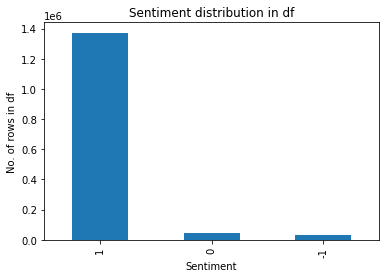

In [6]:
print("Number of rows per star rating:")
print(data['rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
data['sentiment'] = [ map_sentiment(x) for x in data['rating']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(data['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [7]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['sentiment']==1)] 
df_minority = data[(data['sentiment']!=1)] 
# upsample minority class
df_majority_dwnsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 81845, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_dwnsampled = pd.concat([df_majority_dwnsampled, df_minority])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
data = df_dwnsampled

Number of rows per star rating:
5    68267
3    48303
1    17354
2    16188
4    13578
Name: rating, dtype: int64


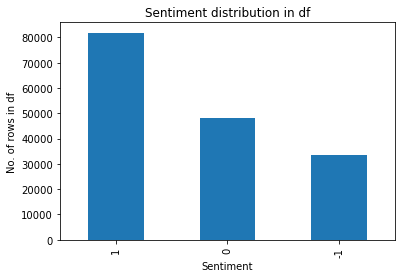

In [9]:
print("Number of rows per star rating:")
print(data['rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
data['sentiment'] = [ map_sentiment(x) for x in data['rating']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(data['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163690 entries, 127608 to 1454301
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   reviews    163659 non-null  object
 1   rating     163690 non-null  int64 
 2   sentiment  163690 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ MB
